In [3]:
#Etienne Pham Do 40130483
#COMP 333 Lab Assignment 2
#Create a Jupyter notebook using Python code and any of its libraries, but especially pandas,
#to write and test code to carry out the Descriptive Data Analysis tasks below in (A){(C).
import pandas as pd
#csv from https://www.kaggle.com/c/titanic
df = pd.read_csv('train.csv')

In [68]:
#First dataset
types = {'PassengerId': 'interval', 
         'Survived':'nominal', 
         'Pclass':['ordinal', [1, 2, 3]], 
         'Name':'nominal', 
         'Sex':'nominal',
         'Age':'ratio',
         'SibSp':'ratio',
         'Parch':'ratio',
         'Ticket':'nominal',
         'Fare': 'ratio',
         'Cabin': 'nominal',
         'Embarked': 'nominal'}
#creating the input for the simpleDDA function
dfWithMeta = {"df": df, "dataTypes": types, "showPlot": False}
dfWithMeta = pd.Series(dfWithMeta)


In [69]:
import numpy as np
import matplotlib.pyplot as plt

def simpleDDA(dfIn):
    DDAdescription = {}
    #A) Overall Descriptions==================================================
    numObs = dfIn['df'].shape[0]
    featureDescription = {}
    
    for key in dfIn['dataTypes']:
        descDict = {}
        numUniqueValues = dfIn['df'][key].nunique()
        numMissingEntries = dfIn['df'][key].isna().sum()
        numEntries = numObs - numMissingEntries
        descDict['ObservationCount'] = numObs
        descDict['EntriesCount'] = numEntries
        descDict['UniqueValuesCount'] = numUniqueValues
        descDict['MissingEntriesCount'] = numMissingEntries
        DDAdescription[key] = descDict
    
    #B.1) Central Tendency Descriptions=======================================
    dataTypeDesc = {}
    for key in dfIn['dataTypes']:
        dataType = dfIn['dataTypes'][key]
        if type(dataType) == list:
            dataType = dfIn['dataTypes'][key][0]
        dtDict = {}
        dtDict['Mode'] = dfIn['df'].mode()[key][0]
        #setting nans for irrelevant values
        dtDict['Mean'] = np.nan
        dtDict['Median'] = np.nan
        #performing the operations (median, mean, etc) depending on the type
        if dataType == 'interval' or dataType == 'ordinal' or dataType == 'ratio':
            median = dfIn['df'][key].median()
            if median not in dfIn['df'][key]:
                median = np.nan
            dtDict['Median'] = median  
        if dataType == 'interval' or dataType == 'ratio':            
            mean = dfIn['df'][key].mean()
            dtDict['Mean'] = mean
        DDAdescription[key].update(dtDict)
    
    #B.2) Spread Descriptions=================================================
    sprDesc = {}
    for key in dfIn['dataTypes']:
        dataType = dfIn['dataTypes'][key]
        dtDict = {}
        #setting nans for irrelevant values
        dtDict['UniqueValues'] = np.nan
        dtDict['Range'] = np.nan
        dtDict['IQR'] = np.nan
        dtDict['StandardDeviation'] = np.nan
        #performing the operations (range, iqr, std) depending on the type
        if dataType == 'nominal':
            dtDict['UniqueValuesNominal'] = dfIn['df'][key].nunique()
        if dataType == 'interval' or dataType == 'ordinal' or dataType == 'ratio':
            dtDict['Range'] = dfIn['df'][key].max() - dfIn['df'][key].min()
        if dataType == 'interval' or dataType == 'ratio':
            dtDict['IQR'] = np.quantile(dfIn['df'][key], 0.75) - np.quantile(dfIn['df'][key], 0.25)
            dtDict['StandardDeviation'] = dfIn['df'][key].std()
        DDAdescription[key].update(dtDict)
    #C) Visual Descriptions===================================================
    if dfIn['showPlot']:
        cat = ['nominal', 'ordinal']
        num = ['interval', 'ratio']
        rows = dfIn['df'].shape[1]
        cols = dfIn['df'].shape[1]
        x = 0
        y = 0
        for key1 in dfIn['dataTypes']:
            dt1 = dfIn['dataTypes'][key1]
            for key2 in dfIn['dataTypes']:
                x += 1
                dt2 = dfIn['dataTypes'][key2]
                plt.subplot(rows, cols, x)
                if key2 == key1:
                    #plot histograms
                    plt.hist(dfIn['df'][key1])
                if (dt1 in cat and dt2 in num) or (dt1 in num and dt2 in cat):
                    #plot box plots
                    print('sorry not supported')
                    plt.boxplot(dfIn['df'][key1])
                if dt1 in cat and dt2 in cat:
                    #plot bar graphs
                    print('sorry not supported')
                    plt.bar(dfIn['df'][key1], dfIn['df'][key2])
                if dt1 in num and dt2 in num:
                    #plot scatter
                    plt.scatter(dfIn['df'][key1], dfIn['df'][key2])
        plt.show()
    
    return pd.DataFrame.from_dict(DDAdescription)
        
        
        

In [70]:
test = simpleDDA(dfWithMeta)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ObservationCount,891.000000,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
EntriesCount,891.000000,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
UniqueValuesCount,891.000000,2.0,3.0,891,2,88.000000,7.000000,7.000000,681,248.000000,147,3
MissingEntriesCount,0.000000,0.0,0.0,0,0,177.000000,0.000000,0.000000,0,0.000000,687,2
Mode,1.000000,0.0,3.0,"Abbing, Mr. Anthony",male,24.000000,0.000000,0.000000,1601,8.050000,B96 B98,S
Mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
Median,446.000000,NaN,3.0,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
UniqueValues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Range,890.000000,NaN,NaN,NaN,NaN,79.580000,8.000000,6.000000,NaN,512.329200,NaN,NaN
IQR,445.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,23.089600,NaN,NaN


sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported


TypeError: 'value' must be an instance of str or bytes, not a float

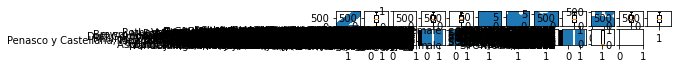

In [71]:
dfWithMeta['showPlot'] = True
test = simpleDDA(dfWithMeta)
test
#plots should show shortly after the errors

In [72]:
#csv file from: http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv
df2 = pd.read_csv('tips.csv')
types2 = {
    'total_bill' : 'ratio',
    'tip' : 'ratio',
    'sex' : 'nominal',
    'smoker' : 'nominal',
    'day' : 'nominal',
    'time' : 'nominal',
    'size' : 'interval'
}
dfWithMeta2 = {"df": df2, "dataTypes": types2, "showPlot": False}
dfWithMeta2 = pd.Series(dfWithMeta2)
test2 = simpleDDA(dfWithMeta2)
test2

,total_bill,tip,sex,smoker,day,time,size
ObservationCount,244.000000,244.000000,244,244,244,244,244.000000
EntriesCount,244.000000,244.000000,244,244,244,244,244.000000
UniqueValuesCount,229.000000,123.000000,2,2,4,2,6.000000
MissingEntriesCount,0.000000,0.000000,0,0,0,0,0.000000
Mode,13.420000,2.000000,Male,No,Sat,Dinner,2.000000
Mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
Median,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
UniqueValues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Range,47.740000,9.000000,NaN,NaN,NaN,NaN,5.000000
IQR,10.780000,1.562500,NaN,NaN,NaN,NaN,1.000000


sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported
sorry not supported


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

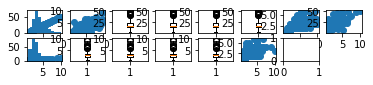

In [73]:
dfWithMeta2 = {"df": df2, "dataTypes": types2, "showPlot": True}
dfWithMeta2 = pd.Series(dfWithMeta2)
test2 = simpleDDA(dfWithMeta2)
test2

In [74]:
#csv from https://datacarpentry.org/python-socialsci/setup.html
df3 = pd.read_csv('SN7577i_a.csv')
types3 = {
    'Id' : 'interval',
    'Q1' : 'interval',
    'Q2' : 'interval',
    'Q3' : 'interval',
    'Q4' : 'interval'
}
dfWithMeta3 = {"df": df3, "dataTypes": types3, "showPlot": False}
dfWithMeta3 = pd.Series(dfWithMeta3)
test3 = simpleDDA(dfWithMeta3)
test3

,Id,Q1,Q2,Q3,Q4
ObservationCount,10.00000,10.000000,10.000000,10.000000,10.000000
EntriesCount,10.00000,10.000000,10.000000,10.000000,10.000000
UniqueValuesCount,10.00000,5.000000,3.000000,4.000000,5.000000
MissingEntriesCount,0.00000,0.000000,0.000000,0.000000,0.000000
Mode,1.00000,1.000000,-1.000000,1.000000,1.000000
Mean,5.50000,4.700000,-0.300000,3.400000,5.000000
Median,NaN,NaN,NaN,1.000000,5.000000
UniqueValues,NaN,NaN,NaN,NaN,NaN
Range,9.00000,9.000000,4.000000,9.000000,9.000000
IQR,4.50000,8.000000,0.000000,4.000000,7.000000


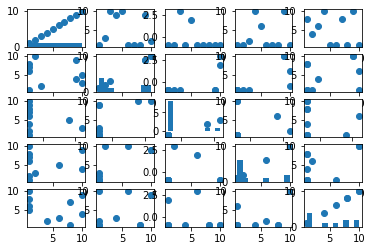

,Id,Q1,Q2,Q3,Q4
ObservationCount,10.00000,10.000000,10.000000,10.000000,10.000000
EntriesCount,10.00000,10.000000,10.000000,10.000000,10.000000
UniqueValuesCount,10.00000,5.000000,3.000000,4.000000,5.000000
MissingEntriesCount,0.00000,0.000000,0.000000,0.000000,0.000000
Mode,1.00000,1.000000,-1.000000,1.000000,1.000000
Mean,5.50000,4.700000,-0.300000,3.400000,5.000000
Median,NaN,NaN,NaN,1.000000,5.000000
UniqueValues,NaN,NaN,NaN,NaN,NaN
Range,9.00000,9.000000,4.000000,9.000000,9.000000
IQR,4.50000,8.000000,0.000000,4.000000,7.000000


In [75]:
dfWithMeta3 = {"df": df3, "dataTypes": types3, "showPlot": True}
dfWithMeta3 = pd.Series(dfWithMeta3)
test3 = simpleDDA(dfWithMeta3)
test3